In [1]:
# #PREREQUISITES FOR COLAB

# !ls
# !git clone https://github.com/uniquetrij/action-detection.git
# !wget http://crcv.ucf.edu/data/UCF101/UCF101.rar
# !sudo apt-add-repository multiverse && sudo apt update
# !sudo apt install unrar

# import os
# os.chdir("action-detection/")

# !pwd

# !pip install opencv-python
# !pip install keras

# !git pull

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from video_data import ExamplesListing, ExamplesSet, DataSet

examples_listing = ExamplesListing.from_path("../datasets/UCF-09/", [".avi"], pickle_path="UCF-09-ExamplesListing.pkl")
examples_set = examples_listing.to_examples_set()
train_set, val_set, test_set = examples_set.split([0.7,0.2,0.1])
train_set = train_set.to_dataset(frame_count=50, resize_width=224, resize_height=224)
val_set = val_set.to_dataset(frame_count=50, resize_width=224, resize_height=224)
test_set = test_set.to_dataset(frame_count=50, resize_width=224, resize_height=224)
generator = train_set.get_batch_generator(2)

(2, 50, 224, 224, 3)
(50, 224, 224, 3)
(224, 224, 3)


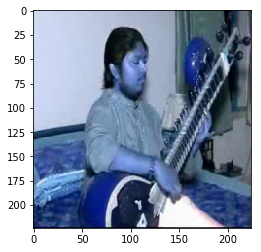

In [3]:
example = next(generator)
# example = generator
# train_set.width
print(example[0].shape)
print(example[0][0].shape)

print(example[0][0][0].shape)
# a = np.reshape(example[0][0][0], (224, 224))
# print(a.shape)
plt.imshow(example[0][0][0])
plt.show()

In [ ]:
from i3d_inception import Inception_Inflated3d
model = Inception_Inflated3d(classes=train_set.get_class_count(), input_shape=(train_set.get_shape()))
model.compile(loss='categorical_crossentropy', optimizer='adam')

Using TensorFlow backend.


In [ ]:
epochs = 100
batch_size = 5

hist = model.fit_generator(train_set.get_batch_generator(batch_size),
                       validation_data=val_set.get_batch_generator(batch_size),
                       epochs=epochs,
                              steps_per_epoch=train_set.size/batch_size,
                              validation_steps=val_set.size/batch_size)

Epoch 1/100
 42/177 [======>.......................] - ETA: 5:12 - loss: 7.5941